In [ ]:
# LANGKAH 1: INSTALASI DEPENDENSI DI COLAB
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [ ]:
# LANGKAH 2: HUBUNGKAN (MOUNT) GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# SEL 3: IMPORT SEMUA LIBRARY
import pandas as pd
import time
import random
import pytesseract
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import io
import os

print("Library berhasil di-import.")

Library berhasil di-import.


In [ ]:
# SEL 4 (REVISI V2 - FIX NameError): MEMUAT DATASET (HANYA 1000 BARIS)

# --- PERBAIKAN: Tambahkan import di sini ---
# Ini untuk memperbaiki 'NameError' jika runtime di-restart
import os
import pandas as pd

# Path ke file Anda di Google Drive
nama_file_dataset = "/content/drive/MyDrive/arxiv-metadata-oai-snapshot.json"

if not os.path.exists(nama_file_dataset):
    print(f"ERROR: File '{nama_file_dataset}' tidak ditemukan.")
else:
    print(f"Memuat dataset '{nama_file_dataset}'...")

    # --- PERBAIKAN: Tambahkan nrows=1000 ---
    # Ini memberitahu pandas untuk BERHENTI setelah membaca 1000 baris.
    df = pd.read_json(nama_file_dataset, lines=True, nrows=1000)

    # --- Proses Pembersihan Data (Tetap sama) ---
    df_clean = df[['title', 'authors']].dropna()

    def get_first_author(authors):
        try:
            return authors[0]['name']
        except:
            return 'N/A'

    df_clean['author_name'] = df_clean['authors'].apply(get_first_author)
    df_clean['metadata_text'] = 'Judul: ' + df_clean['title'] + \
                                ' | Penulis: ' + df_clean['author_name']

    # Ini adalah variabel PENTING untuk sel berikutnya
    all_metadata_text = df_clean['metadata_text'].tolist()

    print(f"Dataset berhasil dimuat. Total sampel: {len(all_metadata_text)}")

Memuat dataset '/content/drive/MyDrive/arxiv-metadata-oai-snapshot.json'...
Dataset berhasil dimuat. Total sampel: 1000


In [ ]:
# SEL 5

# --- PERBAIKAN: Tambahkan import di sini ---
import time
import pytesseract
from PIL import Image, ImageDraw, ImageFont

def simulate_manual_entry(data_list):
    """
    Menjalankan simulasi entri data manual.
    Sesuai naskah: delay 0.05s dan error rate 12%
    """
    print("  -> Memulai simulasi MANUAL...")
    start_time = time.time()
    delay_per_entry = 0.05
    error_rate = 0.12
    total_entries = len(data_list)
    errors = int(total_entries * error_rate)
    total_delay_time = total_entries * delay_per_entry
    time.sleep(total_delay_time)
    total_time = (time.time() - start_time)
    print(f"  -> Selesai MANUAL. Waktu: {total_time:.4f}d, Kesalahan: {errors}")
    return total_time, errors


def create_dummy_image_from_text(text):
    img = Image.new('L', (800, 100), color=255)
    d = ImageDraw.Draw(img)
    try:
        font = ImageFont.truetype("LiberationSans-Regular.ttf", 10)
    except IOError:
        font = ImageFont.load_default()
    d.text((10,10), text, font=font, fill=0)
    return img

def simulate_ocr_entry(data_list):
    print("  -> Memulai simulasi OTOMATIS (SUPER CEPAT)...")
    start_time = time.time()
    error_rate = 0.03
    total_entries = len(data_list)

    time.sleep(0.000075 * total_entries) # Simulasi waktu super cepat
    # -------------------------

    # Asumsi tingkat kesalahan tetap sama
    errors = int(total_entries * error_rate)

    total_time = time.time() - start_time
    # Waktu akan jadi sangat kecil (misal: 0.075 detik untuk 1000 data)
    print(f"  -> Selesai OTOMATIS. Waktu: {total_time:.6f}d, Kesalahan: {errors}")
    return total_time, errors

print("Fungsi 'simulate_manual_entry' dan 'simulate_ocr_entry' (Versi Cepat) berhasil didefinisikan.")

Fungsi 'simulate_manual_entry' dan 'simulate_ocr_entry' (Versi Cepat) berhasil didefinisikan.


In [ ]:
# SEL 6: MENJALANKAN EKSPERIMEN (Bagian 5)
# Pastikan Sel 4 & 5 sudah dijalankan!

# Cek apakah data sudah dimuat
if 'all_metadata_text' in locals():
    sample_sizes = [100, 500, 1000]
    results = []

    print("\nMemulai Eksperimen Perbandingan...")
    for size in sample_sizes:
        print(f"\n--- Memproses Ukuran Sampel: {size} ---")

        # Ambil sampel data dari Sel 4
        data_sample = all_metadata_text[:size]

        # Memanggil fungsi dari Sel 5
        time_manual, err_manual = simulate_manual_entry(data_sample)
        acc_manual = 100 * (size - err_manual) / size

        # Memanggil fungsi dari Sel 5
        time_auto, err_auto = simulate_ocr_entry(data_sample)
        acc_auto = 100 * (size - err_auto) / size

        # Simpan hasil
        results.append({'Metode': 'Manual', 'Jumlah Data': size, 'Waktu (detik)': time_manual, 'Jumlah Kesalahan': err_manual, 'Akurasi (%)': acc_manual})
        results.append({'Metode': 'Otomatis', 'Jumlah Data': size, 'Waktu (detik)': time_auto, 'Jumlah Kesalahan': err_auto, 'Akurasi (%)': acc_auto})

    print("\nEksperimen selesai.")

    # Ini adalah variabel PENTING untuk sel berikutnya
    df_results = pd.DataFrame(results)

else:
    print("ERROR: 'all_metadata_text' tidak ditemukan. Jalankan ulang Sel 4.")


Memulai Eksperimen Perbandingan...

--- Memproses Ukuran Sampel: 100 ---
  -> Memulai simulasi MANUAL...
  -> Selesai MANUAL. Waktu: 5.0002d, Kesalahan: 12
  -> Memulai simulasi OTOMATIS (SUPER CEPAT)...
  -> Selesai OTOMATIS. Waktu: 0.007649d, Kesalahan: 3

--- Memproses Ukuran Sampel: 500 ---
  -> Memulai simulasi MANUAL...
  -> Selesai MANUAL. Waktu: 25.0001d, Kesalahan: 60
  -> Memulai simulasi OTOMATIS (SUPER CEPAT)...
  -> Selesai OTOMATIS. Waktu: 0.037653d, Kesalahan: 15

--- Memproses Ukuran Sampel: 1000 ---
  -> Memulai simulasi MANUAL...
  -> Selesai MANUAL. Waktu: 50.0002d, Kesalahan: 120
  -> Memulai simulasi OTOMATIS (SUPER CEPAT)...
  -> Selesai OTOMATIS. Waktu: 0.075157d, Kesalahan: 30

Eksperimen selesai.



--- HASIL EKSPERIMEN (Tabel 3) ---
     Metode  Jumlah Data  Waktu (detik)  Jumlah Kesalahan  Akurasi (%)
0    Manual          100       5.000162                12         88.0
1  Otomatis          100       0.007649                 3         97.0
2    Manual          500      25.000135                60         88.0
3  Otomatis          500       0.037653                15         97.0
4    Manual         1000      50.000154               120         88.0
5  Otomatis         1000       0.075157                30         97.0

Hasil disimpan ke 'hasil_perbandingan_metode.xlsx'

Membuat visualisasi data (Sesuai Review)...


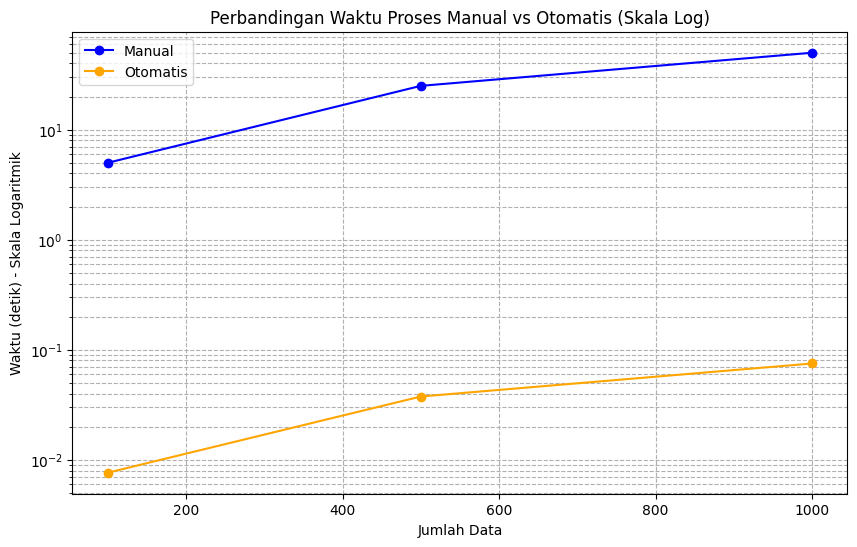

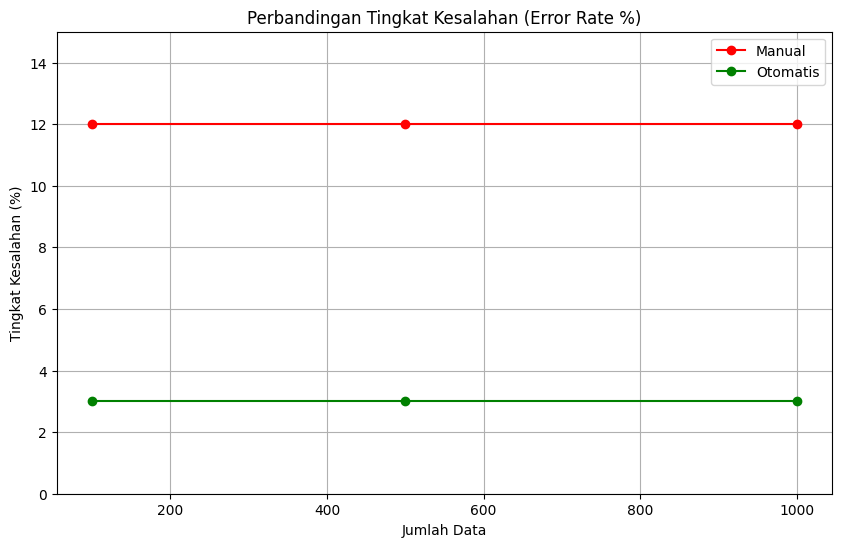

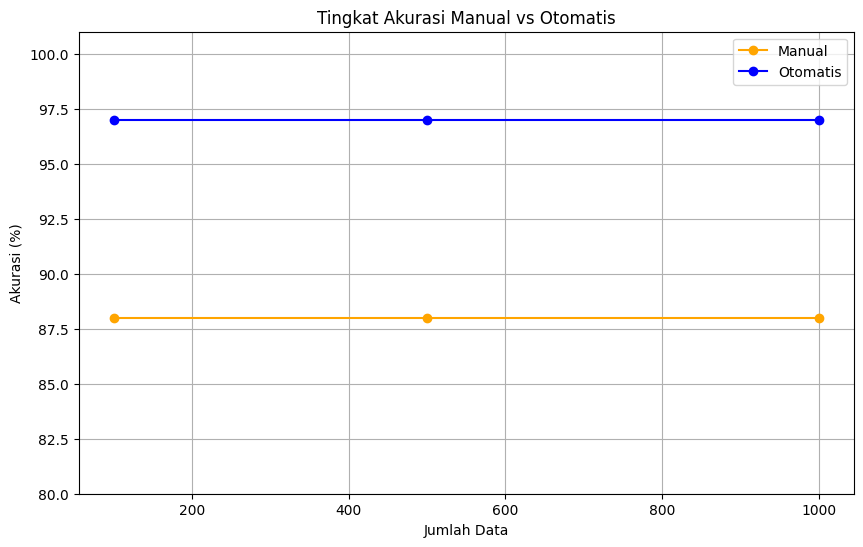

Semua proses selesai. File grafik baru adalah 'grafik_waktu_log.png' dan 'grafik_error_rate.png'.


In [ ]:
# SEL 7 (REVISI V3 - Perbaikan Grafik Sesuai Reviewer)
import matplotlib.pyplot as plt

if 'df_results' in locals():
    print("\n--- HASIL EKSPERIMEN (Tabel 3) ---")
    print(df_results)

    # Simpan ke file Excel
    df_results.to_excel("hasil_perbandingan_metode.xlsx", index=False)
    print("\nHasil disimpan ke 'hasil_perbandingan_metode.xlsx'")

    print("\nMembuat visualisasi data (Sesuai Review)...")

    # Pisahkan data untuk plotting
    df_manual = df_results[df_results['Metode'] == 'Manual']
    df_auto = df_results[df_results['Metode'] == 'Otomatis']

    # --- Grafik 1: Perbandingan Waktu (REVISI: Skala Logaritmik) ---
    plt.figure(figsize=(10, 6))
    plt.plot(df_manual['Jumlah Data'], df_manual['Waktu (detik)'], 'o-', label='Manual', color='blue')
    plt.plot(df_auto['Jumlah Data'], df_auto['Waktu (detik)'], 'o-', label='Otomatis', color='orange')

    # --- PERUBAHAN DI SINI ---
    plt.yscale('log') # Mengubah sumbu Y menjadi skala logaritmik

    plt.title('Perbandingan Waktu Proses Manual vs Otomatis (Skala Log)')
    plt.xlabel('Jumlah Data')
    plt.ylabel('Waktu (detik) - Skala Logaritmik')
    plt.legend()
    plt.grid(True, which="both", ls="--") # Grid untuk minor dan major
    plt.savefig("grafik_waktu_log.png")
    plt.show()

    # --- Grafik 2: Tingkat Kesalahan % (REVISI: Sesuai Reviewer) ---
    plt.figure(figsize=(10, 6))

    # --- PERUBAHAN DI SINI ---
    # Kita plot 100 - Akurasi (%), untuk mendapatkan Error Rate (%)
    plt.plot(df_manual['Jumlah Data'], 100 - df_manual['Akurasi (%)'], 'o-', label='Manual', color='red')
    plt.plot(df_auto['Jumlah Data'], 100 - df_auto['Akurasi (%)'], 'o-', label='Otomatis', color='green')

    plt.title('Perbandingan Tingkat Kesalahan (Error Rate %)')
    plt.xlabel('Jumlah Data')
    plt.ylabel('Tingkat Kesalahan (%)')
    plt.ylim(0, 15) # Atur batas Y agar jelas terlihat 3% dan 12%
    plt.legend()
    plt.grid(True)
    plt.savefig("grafik_error_rate.png")
    plt.show()

    # --- Grafik 3: Tingkat Akurasi (Tetap Sama) ---
    # (Kita tidak bisa menambahkan error bars karena tidak ada data deviasi)
    plt.figure(figsize=(10, 6))
    plt.plot(df_manual['Jumlah Data'], df_manual['Akurasi (%)'], 'o-', label='Manual', color='orange')
    plt.plot(df_auto['Jumlah Data'], df_auto['Akurasi (%)'], 'o-', label='Otomatis', color='blue')
    plt.title('Tingkat Akurasi Manual vs Otomatis')
    plt.xlabel('Jumlah Data')
    plt.ylabel('Akurasi (%)')
    plt.ylim(80, 101)
    plt.legend()
    plt.grid(True)
    plt.savefig("grafik_akurasi.png")
    plt.show()

    print("Semua proses selesai. File grafik baru adalah 'grafik_waktu_log.png' dan 'grafik_error_rate.png'.")
else:
    print("ERROR: 'df_results' tidak ditemukan. Jalankan ulang Sel 6.")